In [9]:
import os 

## Text extraction from pdf. 

In [2]:
## List pdf files 
os.getcwd()

'd:\\PRATIK\\DataVidwan\\Projects\\RAG\\Agentic_RAG\\research'

In [3]:
files = os.listdir("../docs/")

In [4]:
files

['Basics_of_GST.pdf', 'Tax_structure.pdf']

In [5]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs_path = Path("../docs")

all_data = []

for file in files: 
    full_file_path = os.path.join(docs_path, file)
    loader = PyMuPDFLoader(full_file_path)
    data = loader.load()
    all_data.extend(data)

d:\PRATIK\DataVidwan\Projects\RAG\Agentic_RAG\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
len(all_data)

32

In [7]:
dict(all_data[2])

{'id': None,
 'metadata': {'producer': 'Microsoft® Word 2016',
  'creator': 'Microsoft® Word 2016',
  'creationdate': '2017-09-09T10:24:20+00:00',
  'source': '..\\docs\\Basics_of_GST.pdf',
  'file_path': '..\\docs\\Basics_of_GST.pdf',
  'total_pages': 23,
  'format': 'PDF 1.7',
  'title': '',
  'author': '',
  'subject': '',
  'keywords': '',
  'moddate': '2017-09-09T10:24:20+00:00',
  'trapped': '',
  'modDate': "D:20170909102420+00'00'",
  'creationDate': "D:20170909102420+00'00'",
  'page': 2},
 'page_content': 'States with respect to matters listed in List II. Further clause (2) provides that Parliament and \nlegislature of States both have powers to make laws with respect to matter enumerated in List III. \n \nArticle 246A provides power to Parliament and legislature of every State to make laws with \nrespect to goods and services tax imposed by Union or by such State. Clause (2) further provides \nthat Parliament has exclusive power to make laws with respect to goods and service

In [8]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)

split_docs = text_splitter.split_documents(all_data)


In [9]:
len(split_docs)

114

## Store data in VectorDB

In [17]:
## Embedding of data
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-mpnet-base-v2"
)

In [14]:
# from langchain_openai import OpenAIEmbeddings

# embeddings = OpenAIEmbeddings(
#     model="text-embedding-3-large",
#     # With the `text-embedding-3` class
#     # of models, you can specify the size
#     # of the embeddings you want returned.
#     # dimensions=1024
# )

In [18]:
sample_embedding = embeddings.embed_query("hello How r u ? ")

In [19]:
# type(sample_embedding)

len(sample_embedding)

sample_embedding[0:100]

[-0.000539033324457705,
 -0.049166806042194366,
 -0.014800315722823143,
 -0.026128949597477913,
 0.015309869311749935,
 -0.014769413508474827,
 -0.00925299059599638,
 0.03735608607530594,
 0.02448146604001522,
 -0.038752246648073196,
 -0.04880112037062645,
 -0.0206668209284544,
 -0.005471416283398867,
 0.06949550658464432,
 0.015536841936409473,
 -0.05587163195014,
 -0.009604644030332565,
 -0.037566106766462326,
 -0.058962322771549225,
 -0.0015545967034995556,
 -0.02062511071562767,
 0.025934521108865738,
 -0.013549971394240856,
 0.024962492287158966,
 0.01056130975484848,
 0.04615582525730133,
 0.018873989582061768,
 0.032331135123968124,
 -0.03708164766430855,
 0.06559041887521744,
 0.007213206496089697,
 0.047658659517765045,
 0.05986526235938072,
 0.02991335839033127,
 1.6142669210239546e-06,
 0.005667824298143387,
 -0.05221544951200485,
 -0.03874537721276283,
 0.017482781782746315,
 -0.018718579784035683,
 0.011339953169226646,
 -0.03347992151975632,
 -0.012060509994626045,
 0.071

## Store data in vector DB 

In [20]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="Tax",
    embedding_function=embeddings,
    persist_directory="./chroma_db",  
)

vector_store.add_documents(split_docs)
results = vector_store.similarity_search("what is tax ? ", k=5)

In [15]:
results

[Document(id='07331986-2883-4877-9f3a-5da0cc9a963f', metadata={'trapped': '', 'creator': 'Writer', 'moddate': '', 'total_pages': 9, 'format': 'PDF 1.6', 'modDate': '', 'author': '', 'subject': '', 'page': 0, 'creationDate': "D:20250116170235+01'00'", 'file_path': '..\\docs\\Tax_structure.pdf', 'creationdate': '2025-01-16T17:02:35+01:00', 'title': 'Default', 'keywords': '', 'producer': 'LibreOffice 7.4', 'source': '..\\docs\\Tax_structure.pdf'}, page_content='Understanding the Tax Structure in India: A Key Pillar of Nation-Building\nTaxes are the backbone of any nation’s development. Governments worldwide impose taxes\nto fund critical projects, including infrastructure, public education, military advancements, law\nenforcement, and more. India has a well-developed tax structure with clearly demarcated authority\nbetween Central and State Governments and local bodies.  The authority of the government to levy\ntax in India is derived from the Constitution of India, which allocates the po

## Create Retriever

In [10]:
## Embedding of data
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-mpnet-base-v2"
)

d:\PRATIK\DataVidwan\Projects\RAG\Agentic_RAG\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="Tax",
    embedding_function=embeddings,
    persist_directory="./chroma_db",
)

In [12]:
results = vector_store.similarity_search_with_score(query="gst", k=1)

In [13]:
results

[(Document(id='d5ab0560-1c62-41d8-829b-d1273e0f9c17', metadata={'source': '..\\docs\\Basics_of_GST.pdf', 'format': 'PDF 1.7', 'trapped': '', 'moddate': '2017-09-09T10:24:20+00:00', 'title': '', 'keywords': '', 'total_pages': 23, 'file_path': '..\\docs\\Basics_of_GST.pdf', 'creationDate': "D:20170909102420+00'00'", 'creationdate': '2017-09-09T10:24:20+00:00', 'creator': 'Microsoft® Word 2016', 'author': '', 'modDate': "D:20170909102420+00'00'", 'producer': 'Microsoft® Word 2016', 'subject': '', 'page': 6}, page_content='(xxxiii) An anti-profiteering clause has been provided in order to ensure that business \npasses on the benefit of reduced tax incidence on goods or services or both to the \nconsumers. \n(xxxiv)Elaborate transitional provisions have been provided for smooth transition of \nexisting taxpayers to GST regime. \nRate of GST: \nGoods and Services Tax (GST) is an indirect tax which was introduced in India on 1 July \n2017 and was applicable throughout India which replaced mul

In [14]:
retriever = vector_store.as_retriever(
    search_type="mmr", search_kwargs={"k": 5, "fetch_k": 5}
)
retriever.invoke("give me current rate of tax")

[Document(id='c9a13905-5c5f-413e-ad89-d9dc89a9ac41', metadata={'creator': 'Writer', 'keywords': '', 'total_pages': 9, 'moddate': '', 'author': '', 'subject': '', 'file_path': '..\\docs\\Tax_structure.pdf', 'format': 'PDF 1.6', 'modDate': '', 'producer': 'LibreOffice 7.4', 'page': 0, 'source': '..\\docs\\Tax_structure.pdf', 'trapped': '', 'creationDate': "D:20250116170235+01'00'", 'title': 'Default', 'creationdate': '2025-01-16T17:02:35+01:00'}, page_content='income tax is levied by Central Government and is administered by Central Board of Direct taxes\nunder Ministry of Finance in accordance with the provisions of the Income Tax Act. The rates for\npersonal income tax are as follows:-\nIn India, individual taxpayers can choose between two income tax regimes: the Old Tax Regime,\nwhich offers various exemptions and deductions, and the New Tax Regime, which provides lower\ntax rates with limited exemptions.\nNew Tax Regime (Applicable for FY 2024-25 / AY 2025-26):\nAnnual Income (INR)\n

In [15]:
retriever = vector_store.as_retriever(
    search_type="mmr", search_kwargs={"k": 4, "fetch_k": 5}
)
retriever.invoke("give me detail of background of gst ? ")

[Document(id='a25291c5-774a-4c7a-8777-ad4b5ace55cf', metadata={'trapped': '', 'page': 6, 'format': 'PDF 1.7', 'creationdate': '2017-09-09T10:24:20+00:00', 'file_path': '..\\docs\\Basics_of_GST.pdf', 'keywords': '', 'moddate': '2017-09-09T10:24:20+00:00', 'author': '', 'creationDate': "D:20170909102420+00'00'", 'title': '', 'subject': '', 'source': '..\\docs\\Basics_of_GST.pdf', 'creator': 'Microsoft® Word 2016', 'producer': 'Microsoft® Word 2016', 'total_pages': 23, 'modDate': "D:20170909102420+00'00'"}, page_content='(xxxiii) An anti-profiteering clause has been provided in order to ensure that business \npasses on the benefit of reduced tax incidence on goods or services or both to the \nconsumers. \n(xxxiv)Elaborate transitional provisions have been provided for smooth transition of \nexisting taxpayers to GST regime. \nRate of GST: \nGoods and Services Tax (GST) is an indirect tax which was introduced in India on 1 July \n2017 and was applicable throughout India which replaced mult

In [9]:
vector_store.get('ba36c650-8dce-4ad2-a0d3-5887d5258e76')

{'ids': ['ba36c650-8dce-4ad2-a0d3-5887d5258e76'],
 'embeddings': None,
 'documents': ['to administer. \nBACKGROUND \n \nThere is number of taxes being levied on very same transaction by Central Government, \nState Government or local authority. The taxable event in each case is different. However, the major \nsources of income of Government from taxation are from excise duty levied on manufacture of \ngoods, customs duty levied on importation of goods, service tax levied on rendering of service and \nVAT levied on sale of goods. The entries in List I, List II and List III of Schedule VII of \nConstitution of India provide power to Central or State Government to levy tax.    \n \nThe Central Government did not have power to levy tax on sale of goods and the State \nGovernments did not have power to levy duty/tax on manufactures of goods or rendering of service. \nTherefore, Constitution of India has been amended to provide powers to both Central Government \nand State Governments to lev

In [125]:
retriever.invoke("should i pay tax early ? ")

[Document(id='07331986-2883-4877-9f3a-5da0cc9a963f', metadata={'producer': 'LibreOffice 7.4', 'moddate': '', 'file_path': '..\\docs\\Tax_structure.pdf', 'page': 0, 'creator': 'Writer', 'format': 'PDF 1.6', 'author': '', 'creationdate': '2025-01-16T17:02:35+01:00', 'keywords': '', 'total_pages': 9, 'source': '..\\docs\\Tax_structure.pdf', 'trapped': '', 'modDate': '', 'title': 'Default', 'creationDate': "D:20250116170235+01'00'", 'subject': ''}, page_content='Understanding the Tax Structure in India: A Key Pillar of Nation-Building\nTaxes are the backbone of any nation’s development. Governments worldwide impose taxes\nto fund critical projects, including infrastructure, public education, military advancements, law\nenforcement, and more. India has a well-developed tax structure with clearly demarcated authority\nbetween Central and State Governments and local bodies.  The authority of the government to levy\ntax in India is derived from the Constitution of India, which allocates the po

### LLM import 

In [16]:
import os
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv 
load_dotenv()

api_key = os.getenv("MODEL_API_KEY")

llm = ChatOpenAI(api_key=api_key, model_name="gpt-5", temperature=0.1)

In [17]:
llm.invoke("Hello")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 7, 'total_tokens': 89, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cvivw6ZQB0dLHcsLzdjtxym9ErHJo', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b9d78-134d-77f1-9f03-ebd9da42eb85-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 7, 'output_tokens': 82, 'total_tokens': 89, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 64}})

## Create VectorDB TOOl 

In [18]:
from langchain.tools import tool

@tool(description="For vectordb search use this tool")
def vector_db_tool(query: str) -> str: 
    context = retriever.invoke(query)
    # return f"Context retrieved by vectordb : {context} for query {query}"
    final_context = [c.page_content for c in context]
    return final_context

In [19]:
vector_db_tool.name

'vector_db_tool'

In [36]:
print(vector_db_tool.invoke("What is section 80C?"))

['or both are used in the course or furtherance of business. Explanation.––For the purposes of clauses \n(c) and (d), the expression “construction” includes re-construction, renovation, additions or \nalterations or repairs, to the extent of capitalisation, to the said immovable property;  \n(e) goods or services or both on which tax has been paid under section 10;  \n(f) goods or services or both received by a non-resident taxable person except on goods imported by \nhim; \n(g) goods or services or both used for personal consumption; \n(h) goods lost, stolen, destroyed, written off or disposed of by way of gift or free samples; and \n(i) any tax paid in accordance with the provisions of sections 74, 129 and 130. \n \n \nA banking company or a financial institution including a non-banking financial company \nengaged in supply of specified services would either avail proportionate credit or avail 50% of the \neligible input tax credit.', 'or both are used in the course or furtherance of

In [41]:
# query = "What is gst"
# context = vector_db_tool.invoke(query)

query = "What is 18c"
context = vector_db_tool.invoke(query)

In [42]:

context

['Act, 2016 w.e.f. 16th September, 2016. \nArticle-246A has been incorporated in Constitution of India to provide powers to make laws \nwith respect to goods and services tax. Article 246A begins with the words ‘Notwithstanding \nanything contained in Articles 246 and 254, …’ Article 246 makes provision with regard to subject \nmatter of laws made by Parliament and by the Legislatures of States. It provides that Parliament has \nexclusive power to make laws with respect to any matters enumerated in List I in Seventh Schedule. \nThe clause (3) in Article further provides that legislature of State has power to make laws of such',
 'Act, 2016 w.e.f. 16th September, 2016. \nArticle-246A has been incorporated in Constitution of India to provide powers to make laws \nwith respect to goods and services tax. Article 246A begins with the words ‘Notwithstanding \nanything contained in Articles 246 and 254, …’ Article 246 makes provision with regard to subject \nmatter of laws made by Parliament 

In [39]:
from pydantic import BaseModel
from typing import Literal

class ValidationResponse(BaseModel): 
    validation: Literal["yes", "no"]

@tool(description="validate retrieved context from vectordb")
def vector_search_validation(context: list, query: str): 
    structured_llm = llm.with_structured_output(ValidationResponse)
    response = structured_llm.invoke(f"""You need to verify retrived context from vector db whether it is relevant to that query or not and provide response in yes and no. 

    Note : Properly check content and then only return yes or no. make sure detail user have asked is not available then only you return no.
    
    context : {context}

    query : {query}
               
               """)
    return response

In [43]:
vector_search_validation.invoke({"query": query, "context": context})

ValidationResponse(validation='no')

In [55]:
from langchain_tavily import TavilySearch

tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # start_date=None,
    # end_date=None,
    # include_domains=None,
    # exclude_domains=None,
    # include_usage= False
)

In [56]:
tavily_search_tool.invoke("provide me todays match data")

{'query': 'provide me todays match data',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://onefootball.com/en/matches',
   'title': "Today's Football Matches | OneFootball",
   'content': "Today's Matches. Thursday, 8 January ... OneFootball is proud to partner with Yahoo! Sports to deliver quality football content to fans in USA and Canada.",
   'score': 0.99486035,
   'raw_content': None},
  {'url': 'https://www.livescore.com/en/football/live/',
   'title': 'Live Football Scores Today - LiveScore',
   'content': "Stay updated with all the live football scores from today's games across the UK. Instant scores, real-time updates, and comprehensive match details.",
   'score': 0.98646784,
   'raw_content': None},
  {'url': 'https://www.365scores.com/',
   'title': '365Scores: Football Live Scores, Fixtures, Table & Standings',
   'content': "Football live scores by 365Scores, covering over 1,000 competitions with all today's matches of top compe

## Create Agent/Graph

#### Graphs
At its core, LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:
- State: A shared data structure that represents the current snapshot of your application. It can be any data type, but is typically defined using a shared state schema.
- Nodes: Functions that encode the logic of your agents. They receive the current state as input, perform some computation or side-effect, and return an updated state.
- Edges: Functions that determine which Node to execute next based on the current state. They can be conditional branches or fixed transitions.

In [50]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List
from pydantic import BaseModel
from typing import Literal


class AgentState(TypedDict):
    query: str
    context: str
    validation: Literal["yes", "no"]
    answer: str

class ValidationResponse(BaseModel):
    validation: Literal["yes", "no"]


def retrieve_node(state: AgentState):
    query = state["query"]

    docs = retriever.invoke(query)
    context = "\n\n".join(d.page_content for d in docs)

    return {
        "context": context
    }

def validate_node(state: AgentState):
    structured_llm = llm.with_structured_output(ValidationResponse)

    response = structured_llm.invoke(
        f"""
            Answer ONLY yes or no.

            Does the context answer the question?

            Question:
            {state['query']}

            Context:
            {state['context']}
            """
        )

    return {
        "validation": response.validation
    }

def answer_node(state: AgentState):
    answer = llm.invoke(
        f"""
        Answer the question using ONLY the context below.

        Question:
        {state['query']}

        Context:
        {state['context']}
        """
        )

    return {
        "answer": answer.content
    }

# def fallback_node(state: AgentState):
#     return {
#         "answer": "I do not have context for that. Please try websearch."
#     }

def fallback_node(state: AgentState):
    if state["validation"] == "no": 
        context = tavily_search_tool.invoke({"query": state["query"] + "Provide context for india."})
        return {
        "context": context
    }

def route_after_validation(state: AgentState):
    if state["validation"] == "yes":
        return "answer"
    else:
        return "fallback"
    

graph = StateGraph(AgentState)

graph.add_node("retrieve", retrieve_node)
graph.add_node("validate", validate_node)
graph.add_node("answer", answer_node)
graph.add_node("fallback", fallback_node)

graph.set_entry_point("retrieve")
graph.add_edge("retrieve", "validate")

graph.add_conditional_edges(
    "validate",
    route_after_validation
)

graph.add_edge("fallback", "answer")
graph.add_edge("answer", END)

rag_agent = graph.compile()


In [51]:
result = rag_agent.invoke({
    "query": "what is gst"
})

print(result["answer"])

GST (Goods and Services Tax) is India’s nationwide indirect tax on the supply of goods and services, introduced on 1 July 2017 by the Constitution (101st Amendment) Act to replace multiple central and state taxes. It is governed by the GST Council (chaired by the Finance Minister), aims to create a unified common market, and works as a value‑added tax with input tax credits so only value addition is taxed from manufacturer to consumer. Standard rates are 0%, 5%, 12%, 18% and 28%, with special rates of 0.25% on rough precious/semi‑precious stones and 3% on gold, plus a cess over 28% on select items. By definition it excludes alcoholic liquor for human consumption; five petroleum products and electricity are also outside GST (petroleum products temporarily).


In [52]:
result = rag_agent.invoke({
    "query": "should i pay gst in advance ?"
})

print(result["answer"])

Short answer for India: It depends on what you’re supplying.

- Services: Yes. If you receive an advance before providing a service, GST is payable on the advance at the time you receive it. You then adjust this tax when you issue the final invoice. (Sources indicate service providers must pay GST on advances received before supply.)

- Goods: No. Advances received for the supply of goods generally do not attract GST at the time of receipt; GST becomes payable when you issue the invoice/when the supply occurs. (Sources indicate no GST liability arises merely on receipt of advances for goods.)

Key idea: The “time of supply” rules determine when GST liability arises—on receipt for services, and typically on invoice/supply for goods. Make sure to report/reflect the liability correctly in your GST returns for the relevant period.


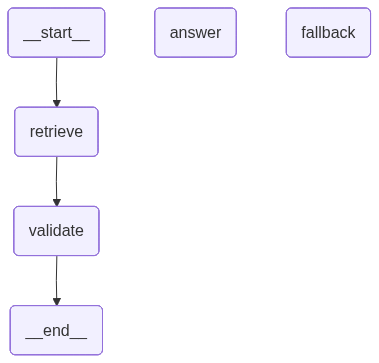

In [53]:
from IPython.display import Image, display

display(Image(rag_agent.get_graph().draw_mermaid_png()))


In [35]:
png_bytes = rag_agent.get_graph().draw_mermaid_png()

with open("agentic_rag_graph.png", "wb") as f:
    f.write(png_bytes)


## Simple Rag 

In [171]:
def simple_rag(query: str) -> str:
    # 1️⃣ Retrieve documents
    docs = retriever.invoke(query)

    # 2️⃣ Prepare context
    context = "\n\n".join(doc.page_content for doc in docs)

    # 3️⃣ Generate answer
    answer = llm.invoke(
        f"""
        Answer the question using the context below.

        Question:
        {query}

        Context:
        {context}
        """
    )

    return answer.content


In [172]:
print(simple_rag("what is gst"))

GST (Goods and Services Tax) is India’s nationwide indirect tax on the supply of goods and services, introduced on 1 July 2017 to replace multiple central and state taxes and create a unified common market. It is governed by the GST Council (chaired by the Finance Minister) and works via input tax credits so only value added at each stage is taxed from manufacturer to consumer.

By definition, alcohol for human consumption is excluded; five petroleum products and electricity are currently outside GST. Standard rates are 0%, 5%, 12%, 18%, and 28%, with special rates (0.25% on rough precious/semi‑precious stones, 3% on gold) and a cess on select items like aerated drinks, luxury cars, and tobacco. Anti-profiteering and transitional provisions were included to protect consumers and ensure smooth migration to the GST regime.


In [173]:
print(simple_rag("what is 63c?"))

63c refers to Capital Gains Tax. It is governed by the Income Tax Act, 1961 and is the tax on profit/gain from selling a capital asset (e.g., stocks, bonds, real estate). It is charged in the year the asset is transferred and is classified as Short-Term Capital Gains (STCG) or Long-Term Capital Gains (LTCG) based on the holding period.


In [174]:
print(simple_rag("what is current tax rate in 2026 ?"))

Here are the current Indian tax rates for AY 2025-26 (FY 2024-25), i.e., applicable in 2026 per your context:

Personal income tax
- New Tax Regime:
  - Up to ₹3,00,000: Nil
  - ₹3,00,001–₹7,00,000: 5%
  - ₹7,00,001–₹10,00,000: 10%
  - ₹10,00,001–₹12,00,000: 15%
  - ₹12,00,001–₹15,00,000: 20%
  - Above ₹15,00,000: 30%
  - Notes: Section 87A rebate makes tax nil up to ₹7,00,000 total income; standard deduction for salaried individuals is ₹75,000; 4% health and education cess applies, plus surcharge on higher incomes.

- Old Tax Regime:
  - Up to ₹2,50,000: Nil
  - ₹2,50,001–₹5,00,000: 5%
  - ₹5,00,001–₹10,00,000: 20%
  - Above ₹10,00,000: 30%
  - Notes: Deductions/exemptions (e.g., 80C, 80D) available; 4% cess and applicable surcharge.

Corporate tax (Domestic companies, AY 2025-26)
- Standard rates:
  - Turnover up to ₹4 billion: 25%
  - Turnover exceeding ₹4 billion: 30%
- Concessional option (Section 115BAA): 22% plus 10% surcharge and 4% cess (effective 25.17%) if foregoing specifie

In [175]:
print(simple_rag("can i pay gst in advance ?"))

Yes. You can deposit money into your Electronic Cash Ledger in advance (via net banking/UPI/credit-debit card, RTGS/NEFT, or over the counter at authorized banks). When you file your return (monthly by the 20th for regular taxpayers; quarterly for composition taxpayers), you debit that cash ledger and quote the debit entry to discharge the tax for that period. 

Note: The liability is considered paid only when you set it off (debit) in the return, even if you funded the cash ledger earlier. You may also use your Electronic Credit Ledger (ITC) to the extent eligible.


In [ ]:
def simple_rag(query: str) -> str:
    # 1️⃣ Retrieve documents
    docs = retriever.invoke(query)

    # 2️⃣ Prepare context
    context = "\n\n".join(doc.page_content for doc in docs)

    # 3️⃣ Generate answer
    answer = llm.invoke(
        f"""
        Answer the question using the context below.

        Question:
        {query}

        Context:
        {context}

        Note : If answer not available in context just say "I do not know answer please try websearch"
        """
    )

    return answer.content
